In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy.random as np 
import sys
import matplotlib

In [23]:
print(sys.version )

3.8.5 (tags/v3.8.5:580fbb0, Jul 20 2020, 15:57:54) [MSC v.1924 64 bit (AMD64)]


In [24]:
print(pd.__version__)

1.2.0


In [25]:
print(matplotlib.__version__)

3.3.4


In [28]:
np.seed(111)
# 生成测试数据的函数
def CreateDataSet(Number=1):
    Output = []
    for i in range(Number):
# 创建一个按周计算的日期范围(每周一起始)
        rng = pd.date_range(start='1/1/2009', end='12/31/2012',freq='W-MON')
# 创建一些随机数
        data = np.randint(low=25, high=1000, size=len(rng))
# 状态池
        status = [1, 2, 3]
# 创建一个随机的状态列表
        random_status = [status[np.randint(low=0, high=len(status))] for i in range(len(rng))]
# 行政州(state)的列表
        states = ['GA','FL','fl','NY','NJ','TX']
# 创建一个行政周的随机列表
        random_states = [states[np.randint(low=0, high=len(states))] for i in range(len(rng))]
        Output.extend(zip(random_states, random_status, data, rng))
    return Output
dataset = CreateDataSet(4)
df = pd.DataFrame(data=dataset, columns=['State','Status','CustomerCount','StatusDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   State          836 non-null    object        
 1   Status         836 non-null    int64         
 2   CustomerCount  836 non-null    int64         
 3   StatusDate     836 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 26.2+ KB


In [29]:
df.head()

,State,Status,CustomerCount,StatusDate
0,GA,1,877,2009-01-05
1,FL,1,901,2009-01-12
2,fl,3,749,2009-01-19
3,FL,3,111,2009-01-26
4,GA,1,300,2009-02-02


In [31]:
df.to_excel(r'C:\Users\谢立虎\Desktop\lesson3.xlsx',index=False)

In [36]:
df=pd.read_excel(r'C:\Users\谢立虎\Desktop\lesson3.xlsx',index_col='StatusDate')
df

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-01-19,fl,3,749
2009-01-26,FL,3,111
2009-02-02,GA,1,300
...,...,...,...
2012-12-03,NY,2,122
2012-12-10,TX,2,887
2012-12-17,TX,2,988


In [37]:
df.index

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-01-26',
               '2009-02-02', '2009-02-09', '2009-02-16', '2009-02-23',
               '2009-03-02', '2009-03-09',
               ...
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-03', '2012-12-10', '2012-12-17',
               '2012-12-24', '2012-12-31'],
              dtype='datetime64[ns]', name='StatusDate', length=836, freq=None)

In [38]:
df['State'].unique()

array(['GA', 'FL', 'fl', 'TX', 'NY', 'NJ'], dtype=object)

In [44]:
df['State']=df.State.apply(lambda x:x.upper())
df[:10]

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-01-19,FL,3,749
2009-01-26,FL,3,111
2009-02-02,GA,1,300
2009-02-09,FL,2,706
2009-02-16,TX,3,347
2009-02-23,FL,2,143
2009-03-02,FL,3,833


In [45]:
df['State'].unique()

array(['GA', 'FL', 'TX', 'NY', 'NJ'], dtype=object)

In [46]:
mask=df['Status']==1
df=df[mask]
df

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-02-02,GA,1,300
2009-03-09,NY,1,992
2009-04-06,FL,1,291
...,...,...,...
2012-06-18,FL,1,669
2012-08-06,TX,1,178
2012-08-20,TX,1,248


In [48]:
df.State[df.State=='NJ']='NY'
df.tail()

<ipython-input-48-8469ecb0d93f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.State[df.State=='NJ']='NY'
C:\Users\谢立虎\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\series.py:963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


,State,Status,CustomerCount
StatusDate,,,
2012-06-18,FL,1,669
2012-08-06,TX,1,178
2012-08-20,TX,1,248
2012-10-08,FL,1,716
2012-10-22,NY,1,955


In [49]:
df['State'].unique()

array(['GA', 'FL', 'NY', 'TX'], dtype=object)

<AxesSubplot:xlabel='StatusDate'>

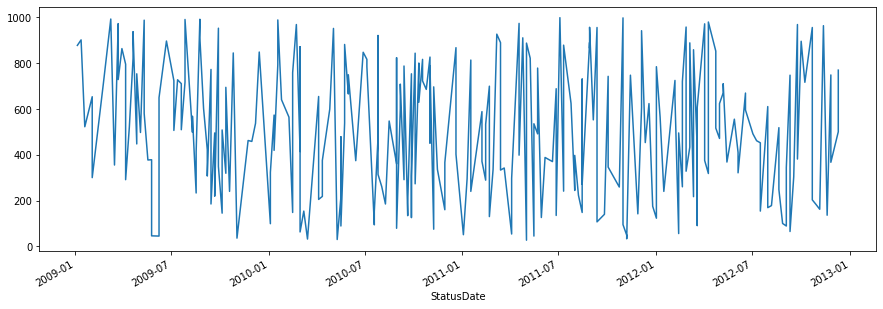

In [52]:
df['CustomerCount'].plot(figsize=(15,5))

In [53]:
sortdf=df[df['State']=='NY'].sort_index(axis=0)
sortdf[:10]

,State,Status,CustomerCount
StatusDate,,,
2009-01-19,NY,1,522
2009-02-23,NY,1,710
2009-03-09,NY,1,992
2009-03-16,NY,1,355
2009-03-23,NY,1,728
2009-03-30,NY,1,863
2009-04-13,NY,1,520
2009-04-20,NY,1,820
2009-04-20,NY,1,937


In [56]:
Daily=df.reset_index().groupby(['State','StatusDate']).sum()
Daily

Status  CustomerCount
State StatusDate                       
FL    2009-01-12       1            901
      2009-02-02       1            653
      2009-03-23       1            752
      2009-04-06       2           1086
      2009-06-08       1            649
...                  ...            ...
TX    2012-08-06       1            178
      2012-08-20       1            248
      2012-08-27       1            100
      2012-09-03       1             89
      2012-10-29       1            183

[239 rows x 2 columns]

In [58]:
Dais=df.reset_index().groupby('State').sum()
Dais

,Status,CustomerCount
State,,
FL,96,50429
GA,47,23401
NY,93,50607
TX,33,13526


In [59]:
del Daily['Status']
Daily[:10]

CustomerCount
State StatusDate               
FL    2009-01-12            901
      2009-02-02            653
      2009-03-23            752
      2009-04-06           1086
      2009-06-08            649
      2009-07-06            723
      2009-07-13            727
      2009-07-20            710
      2009-08-10            498
      2009-08-24           1902

In [60]:
Daily.index

MultiIndex([('FL', '2009-01-12'),
            ('FL', '2009-02-02'),
            ('FL', '2009-03-23'),
            ('FL', '2009-04-06'),
            ('FL', '2009-06-08'),
            ('FL', '2009-07-06'),
            ('FL', '2009-07-13'),
            ('FL', '2009-07-20'),
            ('FL', '2009-08-10'),
            ('FL', '2009-08-24'),
            ...
            ('TX', '2012-01-09'),
            ('TX', '2012-02-27'),
            ('TX', '2012-03-12'),
            ('TX', '2012-04-23'),
            ('TX', '2012-04-30'),
            ('TX', '2012-08-06'),
            ('TX', '2012-08-20'),
            ('TX', '2012-08-27'),
            ('TX', '2012-09-03'),
            ('TX', '2012-10-29')],
           names=['State', 'StatusDate'], length=239)

In [63]:
Daily.index.levels[0]

Index(['FL', 'GA', 'NY', 'TX'], dtype='object', name='State')

In [64]:
Daily.index.levels[1]

DatetimeIndex(['2009-01-05', '2009-01-12', '2009-01-19', '2009-02-02',
               '2009-02-23', '2009-03-09', '2009-03-16', '2009-03-23',
               '2009-03-30', '2009-04-06',
               ...
               '2012-09-24', '2012-10-01', '2012-10-08', '2012-10-22',
               '2012-10-29', '2012-11-05', '2012-11-12', '2012-11-19',
               '2012-11-26', '2012-12-10'],
              dtype='datetime64[ns]', name='StatusDate', length=161, freq=None)

In [65]:
df.head()

,State,Status,CustomerCount
StatusDate,,,
2009-01-05,GA,1,877
2009-01-12,FL,1,901
2009-02-02,GA,1,300
2009-03-09,NY,1,992
2009-04-06,FL,1,291


In [66]:
Daily.index.levels[1].weekday

Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            ...
            0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
           dtype='int64', name='StatusDate', length=161)

<AxesSubplot:xlabel='StatusDate'>

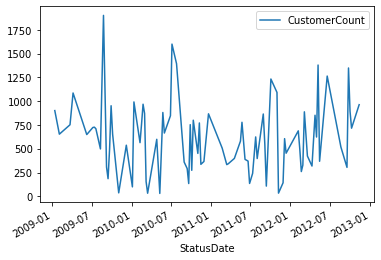

In [67]:
Daily.loc['FL'].plot()

<ipython-input-77-77df7c9b2041>:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  Daily.loc['FL']['2012'].plot(figsize=(15,5))


<AxesSubplot:xlabel='StatusDate'>

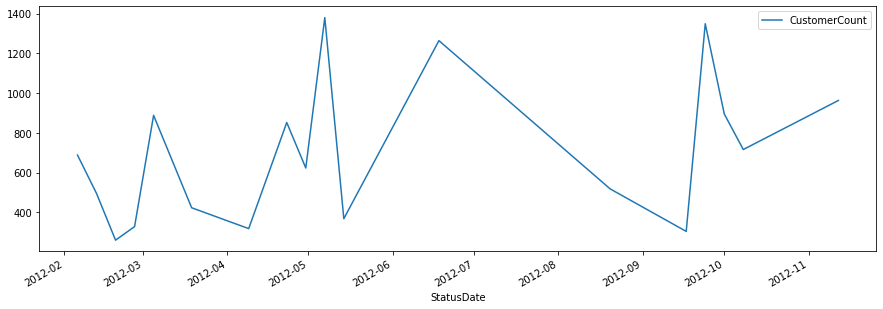

In [77]:
Daily.loc['FL']['2012'].plot(figsize=(15,5))